In [1]:
import seaborn as srb
import pandas as pd
import statistics as sta

In [2]:
df = pd.read_csv('Churn.csv', sep=';')
df.head()

,X0,X1,X2,X3,X4,X4.1,X6,X7,X8,X9,X10,X11
0,1,619,RS,Feminino,42,2,0,1,1,1,10134888.0,1
1,2,608,SC,Feminino,41,1,8380786,1,0,1,11254258.0,0
2,3,502,RS,Feminino,42,8,1596608,3,1,0,11393157.0,1
3,4,699,RS,Feminino,39,1,0,2,0,0,9382663.0,0
4,5,850,SC,Feminino,43,2,12551082,1,1,1,790841.0,0


In [3]:
# Tratamento dos dados
# Renomear as colunas
df.columns = ['Id', 'Score', 'Estado', 'Genero', 'Idade', 'Patrimônio', 'Saldo', 'Produtos', 'TemCartCredito', 'Ativo', 'Salário', 'Saiu']

In [4]:
df.head()

,Id,Score,Estado,Genero,Idade,Patrimônio,Saldo,Produtos,TemCartCredito,Ativo,Salário,Saiu
0,1,619,RS,Feminino,42,2,0,1,1,1,10134888.0,1
1,2,608,SC,Feminino,41,1,8380786,1,0,1,11254258.0,0
2,3,502,RS,Feminino,42,8,1596608,3,1,0,11393157.0,1
3,4,699,RS,Feminino,39,1,0,2,0,0,9382663.0,0
4,5,850,SC,Feminino,43,2,12551082,1,1,1,790841.0,0


In [5]:
# Começando análise exploratória
# Agrupando por tamanho de estado
por_estado = df.groupby(['Estado']).size()
por_estado

Estado
PR    257
RP      1
RS    478
SC    258
SP      4
TD      1
dtype: int64

<Axes: xlabel='Estado'>

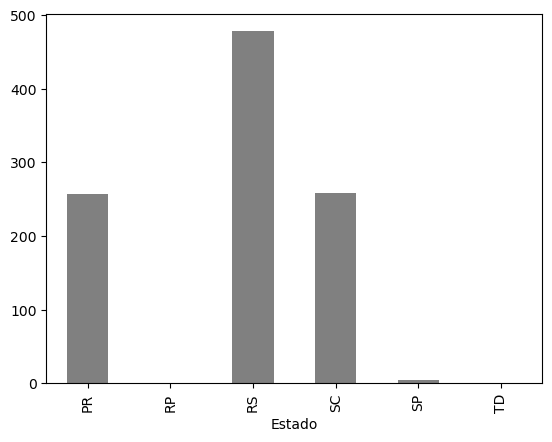

In [6]:
# Visualizando os dados
por_estado.plot.bar(color='gray')

In [7]:
por_genero = df.groupby(['Genero']).size()

<Axes: xlabel='Genero'>

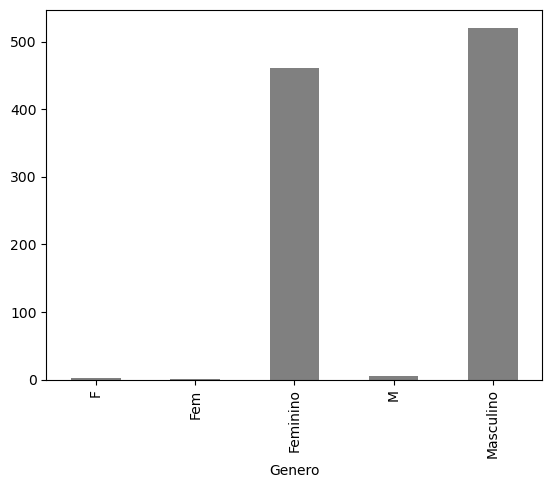

In [8]:
por_genero.plot.bar(color='gray')

In [9]:
# Explorar colunas numéricas
df['Score'].describe()

count    999.000000
mean     648.621622
std       98.264219
min      376.000000
25%      580.000000
50%      653.000000
75%      721.000000
max      850.000000
Name: Score, dtype: float64

Text(0.5, 1.0, 'Score')

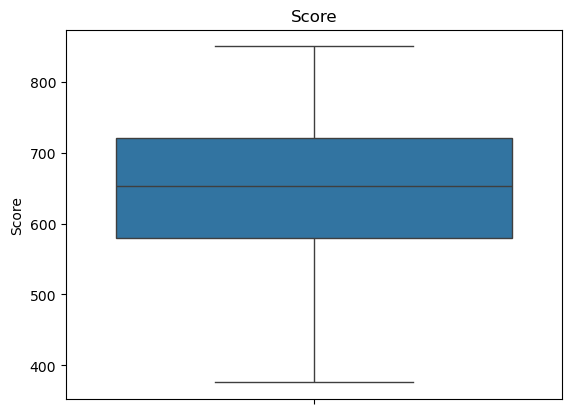

In [15]:
# Boxplot do seaborn
srb.boxplot(df['Score']).set_title('Score')

C:\Users\rafae\AppData\Local\Temp\ipykernel_9352\2504452448.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  srb.distplot(df['Score']).set_title('Score')


Text(0.5, 1.0, 'Score')

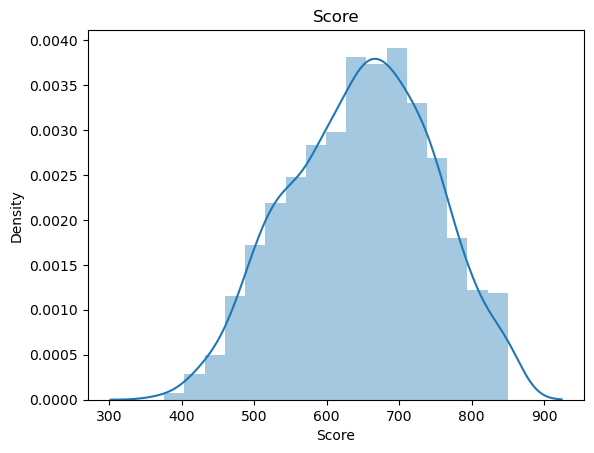

In [18]:
srb.distplot(df['Score']).set_title('Score')

In [23]:
df['Idade'].describe()

count    999.000000
mean      38.902903
std       11.401912
min      -20.000000
25%       32.000000
50%       37.000000
75%       44.000000
max      140.000000
Name: Idade, dtype: float64

Text(0.5, 1.0, 'Idade')

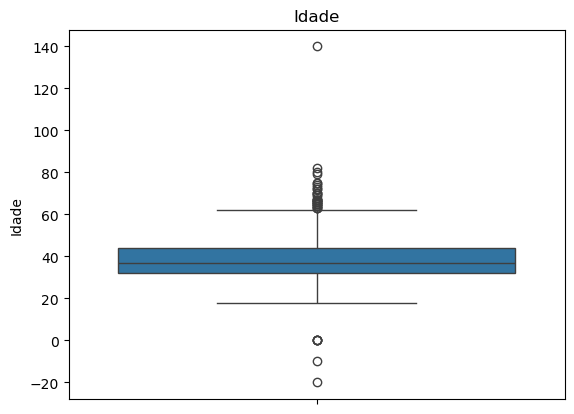

In [25]:
srb.boxplot(df['Idade']).set_title('Idade')

C:\Users\rafae\AppData\Local\Temp\ipykernel_9352\3811137973.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  srb.distplot(df['Idade']).set_title('Idade')


Text(0.5, 1.0, 'Idade')

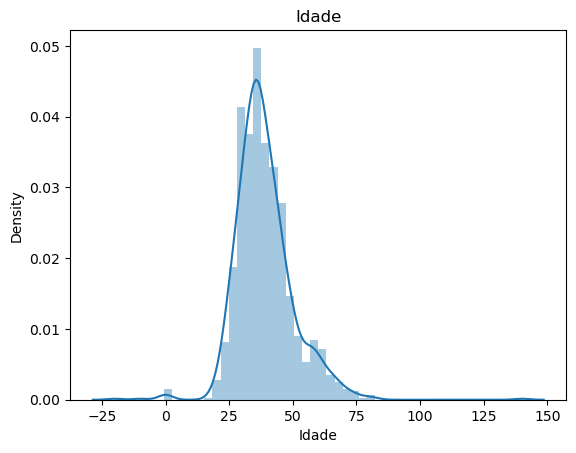

In [27]:
srb.distplot(df['Idade']).set_title('Idade')

In [29]:
# Contando valores NaN
df.isnull().sum()

Id                0
Score             0
Estado            0
Genero            8
Idade             0
Patrimônio        0
Saldo             0
Produtos          0
TemCartCredito    0
Ativo             0
Salário           7
Saiu              0
dtype: int64

In [31]:
# Substituindo valores NaN pela mediana
# Obs: substituir valores categóricos pela moda e valores numéricos pela mediana
mediana = sta.median(df['Salário'])
df['Salário'].fillna(mediana, inplace=True)

C:\Users\rafae\AppData\Local\Temp\ipykernel_9352\2854508948.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Salário'].fillna(mediana, inplace=True)


In [33]:
# Checando a substituição
df['Salário'].isnull().sum()

0

In [35]:
# Preencher NAs com masculino (moda)
df['Genero'].fillna("Masculino", inplace=True)

C:\Users\rafae\AppData\Local\Temp\ipykernel_9352\1029606996.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Genero'].fillna("Masculino", inplace=True)


In [37]:
df["Genero"].isnull().sum()

0

In [39]:
# Padroniza de acordo com o domínio
df.loc[df['Genero'] == 'M', 'Genero'] = 'Masculino' # Alteramos todos os valores 'M' para masculinos
df.loc[df['Genero'].isin(['Fem', 'F']), 'Genero'] = "Feminino"

agrupado = df.groupby(['Genero']).size()
agrupado

Genero
Feminino     464
Masculino    535
dtype: int64

In [41]:
# Visualizando dados alienígenas
df.loc[(df['Idade'] < 0) | (df['Idade'] > 120)] = sta.median(df['Idade'])

In [45]:
# Buscando dados duplicados
df[df.duplicated(['Id'], keep=False)]

,Id,Score,Estado,Genero,Idade,Patrimônio,Saldo,Produtos,TemCartCredito,Ativo,Salário,Saiu
36,37,490,SC,Masculino,31,3,14526023,1,0,1,11406677.0,0
80,81,665,RS,Feminino,34,1,9664554,2,0,0,17141366.0,0
81,81,665,RS,Feminino,34,1,9664554,2,0,0,17141366.0,0
867,37,37,37,37,37,37,37,37,37,37,37.0,37
984,37,37,37,37,37,37,37,37,37,37,37.0,37
990,37,37,37,37,37,37,37,37,37,37,37.0,37


In [47]:
# Excluindo duplicatas
df.drop_duplicates(subset="Id", keep="first", inplace=True)

In [49]:
df[df.duplicated(['Id'], keep=False)]

,Id,Score,Estado,Genero,Idade,Patrimônio,Saldo,Produtos,TemCartCredito,Ativo,Salário,Saiu


In [51]:
# Estados fora do domínio
estados = df.groupby(['Estado']).size()

In [53]:
estados

Estado
PR    257
RP      1
RS    474
SC    258
SP      4
TD      1
dtype: int64

In [61]:
# Substituir estados não existentes pela moda
df.loc[df["Estado"].isin(["RP", "SP", "TD"]), "Estado"] = "RS"
df.groupby(df["Estado"]).size()

Estado
PR    257
RS    480
SC    258
dtype: int64

In [65]:
# Calculando desvio padrão
dsv = sta.stdev(df["Salário"])

In [67]:
dsv

529784177.60963464

In [71]:
# Filtrar salários duas vezes maiores que o desvio padrão
df.loc[df["Salário"] >= 2 * dsv, "Salário"] = sta.median(df["Salário"])
# Note que usamos a mediana da series salário como base, por serem dados numéricos

In [73]:
df.head()

,Id,Score,Estado,Genero,Idade,Patrimônio,Saldo,Produtos,TemCartCredito,Ativo,Salário,Saiu
0,1,619,RS,Feminino,42,2,0,1,1,1,10134888.0,1
1,2,608,SC,Feminino,41,1,8380786,1,0,1,11254258.0,0
2,3,502,RS,Feminino,42,8,1596608,3,1,0,11393157.0,1
3,4,699,RS,Feminino,39,1,0,2,0,0,9382663.0,0
4,5,850,SC,Feminino,43,2,12551082,1,1,1,790841.0,0


In [75]:
df.shape

(995, 12)